*"Brain Tumor Detection using Deep Learning"*

In [1]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data_dir = r'D:\IP Practical\Miniproject'
yes_dir = os.path.join(data_dir, "yes")
no_dir = os.path.join(data_dir, "no")

In [3]:
img_width = 256
img_height = 256

In [4]:
images = []
labels = []

In [5]:
for filename in os.listdir(yes_dir):
    img_path = os.path.join(yes_dir, filename)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (img_width, img_height))
    images.append(img)
    labels.append(1)

In [6]:
for filename in os.listdir(no_dir):
    img_path = os.path.join(no_dir, filename)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (img_width, img_height))
    images.append(img)
    labels.append(0)

In [7]:
df = pd.DataFrame()
df['image'], df['label'] = images, labels

In [8]:
df

,image,label
0,"[[[3, 3, 3], [3, 3, 3], [3, 3, 3], [3, 3, 3], ...",1
1,"[[[255, 255, 255], [255, 255, 255], [254, 254,...",1
2,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",1
3,"[[[251, 251, 251], [218, 218, 218], [216, 216,...",1
4,"[[[12, 12, 12], [10, 10, 10], [9, 9, 9], [10, ...",1
...,...,...
248,"[[[164, 164, 164], [10, 10, 10], [11, 11, 11],...",0
249,"[[[2, 2, 2], [9, 9, 9], [14, 14, 14], [16, 16,...",0
250,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0
251,"[[[11, 11, 11], [11, 11, 11], [11, 11, 11], [1...",0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   253 non-null    object
 1   label   253 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.1+ KB


In [10]:
df['image'].values[10]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

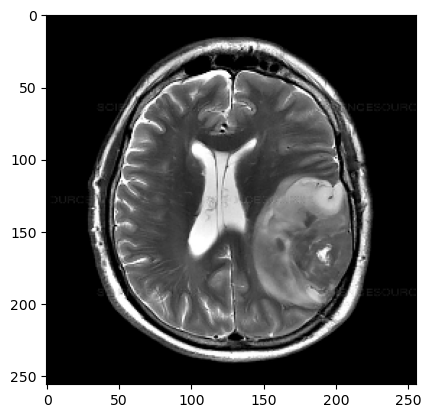

In [11]:
plt.imshow(df['image'].values[10])

In [12]:
df['label'].values[10]     # 0 - Tumor Not Present, 1 - Tumor Present

1

In [13]:
df['image'].values[10].shape

(256, 256, 3)

In [14]:
np.unique(df['label'])

array([0, 1], dtype=int64)

In [15]:
images = np.array(images)

In [16]:
labels = np.array(df['label'])

In [17]:
print("Images shape:", images.shape)
print("Labels shape:", labels.shape)

Images shape: (253, 256, 256, 3)
Labels shape: (253,)


In [18]:
images = np.array(df['image'].values)

images_gray = []
for img in images:
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gray = np.expand_dims(img_gray, axis=-1)
    images_gray.append(img_gray)

images_gray = np.array(images_gray)

In [19]:
print(images_gray.shape) 

(253, 256, 256, 1)


In [20]:
images_gray = images_gray / 255.0

In [21]:
X_train, X_test, y_train, y_test = train_test_split(images_gray, labels, test_size=0.2, random_state=42)

In [22]:
print("X_train Shape :",X_train.shape)
print("X_test Shape :",X_test.shape)
print("y_train Shape :",y_train.shape)
print("y_test Shape :",y_test.shape)

X_train Shape : (202, 256, 256, 1)
X_test Shape : (51, 256, 256, 1)
y_train Shape : (202,)
y_test Shape : (51,)


In [23]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [24]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [25]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

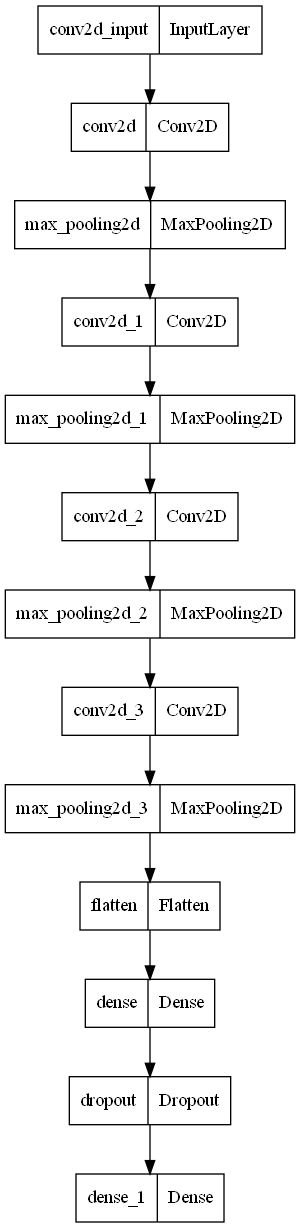

In [26]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [27]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), verbose=1)

Epoch 1/30
7/7 [==============================] - 21s 3s/step - loss: 1.0125 - accuracy: 0.5842 - val_loss: 0.6603 - val_accuracy: 0.5294
Epoch 2/30
7/7 [==============================] - 19s 3s/step - loss: 0.6088 - accuracy: 0.6683 - val_loss: 0.5882 - val_accuracy: 0.7059
Epoch 3/30
7/7 [==============================] - 23s 3s/step - loss: 0.5325 - accuracy: 0.7822 - val_loss: 0.5607 - val_accuracy: 0.6863
Epoch 4/30
7/7 [==============================] - 23s 3s/step - loss: 0.4809 - accuracy: 0.7673 - val_loss: 0.5710 - val_accuracy: 0.7255
Epoch 5/30
7/7 [==============================] - 23s 3s/step - loss: 0.4487 - accuracy: 0.7921 - val_loss: 0.5592 - val_accuracy: 0.7647
Epoch 6/30
7/7 [==============================] - 24s 3s/step - loss: 0.4658 - accuracy: 0.8168 - val_loss: 0.5193 - val_accuracy: 0.8039
Epoch 7/30
7/7 [==============================] - 24s 3s/step - loss: 0.4385 - accuracy: 0.8069 - val_loss: 0.5183 - val_accuracy: 0.8039
Epoch 8/30
7/7 [==================

In [28]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Loss: ',test_loss)
print('Test Accuracy: ',test_acc)

2/2 [==============================] - 2s 604ms/step - loss: 0.8980 - accuracy: 0.8431
Test Loss:  0.8980012536048889
Test Accuracy:  0.843137264251709


In [61]:
image_index=1

In [62]:
test_image = X_test[image_index]

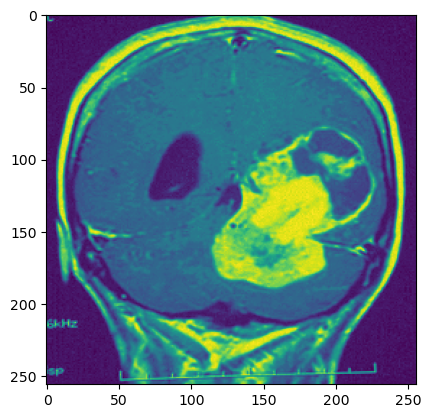

In [63]:
plt.imshow(test_image)
plt.show()

In [64]:
test_image.shape

(256, 256, 1)

In [65]:
prediction = model.predict(np.array([test_image]))
predicted_label = int(prediction[0][0] > 0.5)

1/1 [==============================] - 0s 85ms/step


In [66]:
print("Actual Label:", y_test[image_index])
print("Predicted Label:", predicted_label)

Actual Label: 1
Predicted Label: 1


In [67]:
if prediction[0][0] < 0.5:
    print("Tumor not present")
    execute = 0
else:    
    print("Tumor Present")
    execute = 1

Tumor Present
